Chapter 10
# Statistical Distributions

We can think of a distribution as a function that describes the relationship between observations in a sample space.

Many data conform to well-known and well-understood mathematical functions, such as the Gaussian (aka normal) distribution.

A function can fit the data with a modification of the parameters of the function e.g. mean and standard deviation (in the case of the Gaussian)

Once a distribution function is known, it can be used as a shorthand for describing and calculating related quantities, such as likelihoods of observations, and plotting the relationship between observations in the domain

Density functions are functions that describe how the proportion of data or likelihood of the proportion of observations change over the range of the distribution:
- Probability Density Function (PDF) - calculates the probability of observing a given value
- Cumulative Density Function (CDF) - calculates the probaility of an observation equal or less than a value.  It is often plotted as a curve from 0 to 1

Both PDFs and CDFs are continuous functions.  The equivalent of a PDF for a discrete distribution is called a probability mass function (PMF)

CDF values are usually given in z-tables

# Gaussian Distribution
A Gaussian (or normal) distribution can be described using two parameters:
- mean - the expected value of the distribution
- variance - describes the spread of observation from the mean

It is common to use a normalised calculation of the variance:
- standard deviation - describes the normalised spread of observations from the mean

We can work with the Gaussian distribution via the SciPy module: norm.  The norm.pdf() function can be used to create a Gaussian probability density function with a given sample space, mean and standard deviation

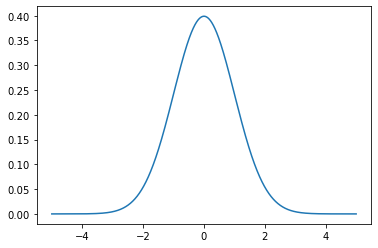

In [71]:
# plot the gaussian pdf
from numpy import arange
from matplotlib import pyplot as plt
from scipy.stats import norm

# define the distribution parameters
sample_space = arange(-5, 5, 0.001)
mean = 0.0
stdev = 1.0

# calculate the pdf
pdf = norm.pdf(sample_space, mean, stdev)

# plot
plt.plot(sample_space, pdf)
plt.show()

The norm.cdf() function can be used to create a Gaussian cumultive density function.

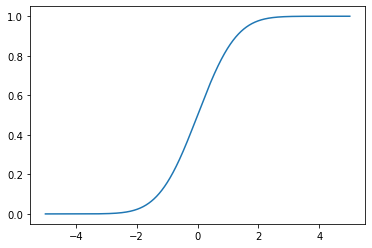

In [2]:
# plot the gaussian cdf for the same sample space
from numpy import arange
from matplotlib import pyplot as plt
from scipy.stats import norm

# define the distribution parameters
sample_space = arange(-5, 5, 0.001)

# calculate the cdf
cdf = norm.cdf(sample_space)

# plot
plt.plot(sample_space, cdf)
plt.show()

# (Student's) t-Distribution
This is a distribution that arises when attempting to estimate the mean of a normal distribution with different sized samples.  

As such, it is a helpful shortcut when describing uncertainty or error related to estimating population statistics for data drawn from Gaussian distributions when the size of the sample must be taken into account

Although you may not use the t-distribution directly, you may estimate values from the distribution required as parameters in other statistical methods, such as statistical significance tests

The distribution can be described using a single parameter: number of degrees of freedom (i.e. number of pieces of information used to describe a population quantity).  In practice, if you require a value from a t-distribution in teh calculation of a statistic, then df will likely be n - 1 (where n is the size of sample drawn from a Gaussian distribution)

Observations in a t-distribution are calculated from observations in a normal distribution in order to describe the interval for the populations mean in the normal distribution.

Observations are calculated by the distance from the mean, divided by the standard deviation divided by the square root of the sample size

SciPy provides tools for working with the t-distribution in the stats.t module.  The t.pdf() function can be used to create a t-distribution with the specified df.

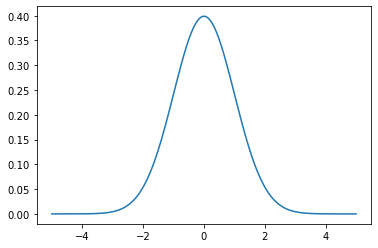

In [3]:
# plot the t-distribution pdf
from numpy import arange
from matplotlib import pyplot as plt
from scipy.stats import t

# define the distribution parameters
sample_space = arange(-5, 5, 0.001)
dof = len(sample_space) - 1

# calculate the pdf
pdf = t.pdf(sample_space, dof)

# plot
plt.plot(sample_space, pdf)
plt.show()

# the key difference between this plot and the Gaussian is the fatter tails, highlighting the increased likelihood of observations in the tails compared to that of the Gaussian

The t.cdf() function can be used to create the cumulative density function for the t-distribution

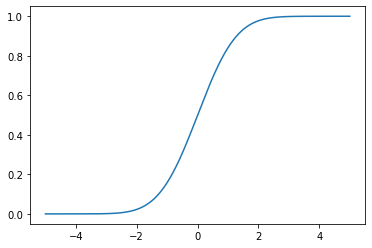

In [4]:
# plot the t-distribution cdf
from numpy import arange
from matplotlib import pyplot as plt
from scipy.stats import t

# define the distribution parameters
sample_space = arange(-5, 5, 0.001)
dof = len(sample_space) - 1

# calculate the cdf
cdf = t.cdf(sample_space, dof)

# plot
plt.plot(sample_space, cdf)
plt.show()

# the key difference between this plot and that for the Gaussian is slightly softer transitions from zero-probability to one-probability for the fatter tails

# Chi-Squared Distribution
This distribution is also used in statistical methods on data drawn from a Gaussian distribution to quantify the uncertainty e.g. the Chi-Squared statistical tests for independence

In fact, the Chi-Squared distribution is used in the derivation of the t-distribution.

The Chi-Squared distribution has a single parameter: degrees of freedom, denoted k

Observations are calculated as the sum of k squared observations drawn from a Gaussian distribution

Again, as with a t-distribution, data does not fit a Chi-Squared Distribution: instead, observations are drawn from this distribution in the calculation of statistical methods for a sample of Gaussian data.

SciPy provides the stats.chi2 module for calculating statistics for the Chi-Squared distribution.  The chi2.pdf() function can be used to calculate the the Chi-Squared distribution.  Remember that the sum squared values must be positive, resulting in the need for a positive sample space

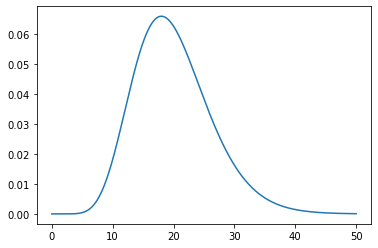

In [5]:
# plot the chi-squared pdf
from numpy import arange
from matplotlib import pyplot as plt
from scipy.stats import chi2

# define the distribution parameters
sample_space = arange(0, 50, 0.01)
dof = 20

# calculate the pdf
pdf = chi2.pdf(sample_space, dof)

# plot
plt.plot(sample_space, pdf)
plt.show()

# The expected value of the distribution is just short of the number of degrees of freedom.  Although the distribution has a bell-like shape, it is not symmetric

The chi2.cdf() function can be used to calculate the cumulative density function over the same sample space

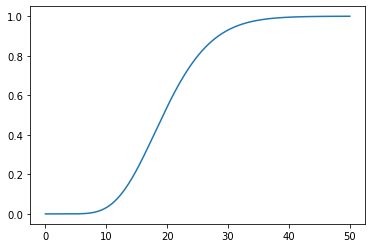

In [6]:
# plot the chi-squared cdf
from numpy import arange
from matplotlib import pyplot as plt
from scipy.stats import chi2

# define the distribution parameters
sample_space = arange(0, 50, 0.01)
dof = 20

# calculate the cdf
cdf = chi2.cdf(sample_space, dof)

# plot
plt.plot(sample_space, cdf)
plt.show()

# Extensions

Probability Density Function


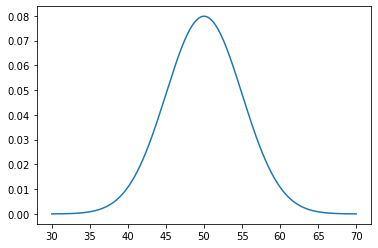


Cumulative Density Function


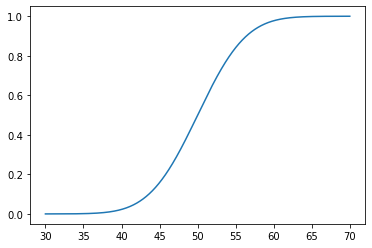

In [27]:
# recreate the PDF and CDF plots for one distribution with a new sample space
from numpy import arange
from matplotlib import pyplot as plt
from scipy.stats import norm 

# define the distribution parameters
sample_space = arange(30, 70, 0.01)
mean = 50.0
stdev = 5.0

# calculate and plot the pdf
print('Probability Density Function')
pdf = norm.pdf(sample_space, mean, stdev)
plt.plot(sample_space, pdf)
plt.show()

# calculate and plot the cdf
print('\nCumulative Density Function')
data = norm(loc=mean, scale=stdev)
cdf = data.cdf(sample_space)
plt.plot(sample_space, cdf)
plt.show()

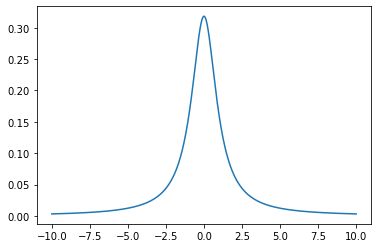

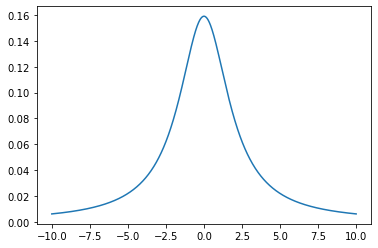

In [38]:
# calculate and plot the PDF and CDF for the Cauchy distribution
import numpy as np
from scipy.stats import cauchy
from matplotlib import pyplot as plt

# define the distribution parameters 
location = 0
gamma = 1.0
x = np.linspace(-10, 10, 1000)

# plot the distributions
fig, ax = plt.subplots(1, 1)
plt.plot(x, cauchy.pdf(x, location, gamma))
plt.show()

# define different distribution parameters 
location = 0
gamma = 2.0
x = np.linspace(-10, 10, 1000)

# plot the distributions
fig, ax = plt.subplots(1, 1)
plt.plot(x, cauchy.pdf(x, location, gamma))
plt.show()

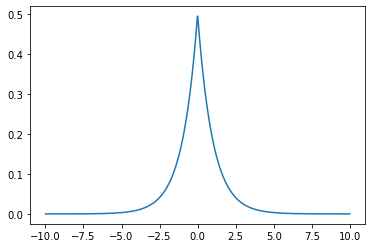

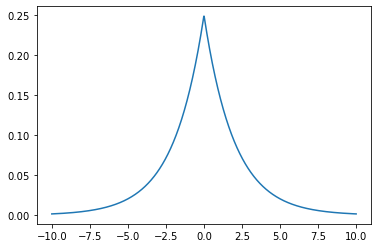

In [40]:
# calculate and plot the PDF and CDF for the Laplace distribution
import numpy as np
from scipy.stats import laplace
from matplotlib import pyplot as plt

# define the distribution parameters 
location = 0
delta = 1.0
x = np.linspace(-10, 10, 1000)

# plot the distributions
fig, ax = plt.subplots(1, 1)
plt.plot(x, laplace.pdf(x, location, delta))
plt.show()

# define different distribution parameters 
location = 0
delta = 2.0
x = np.linspace(-10, 10, 1000)

# plot the distributions
fig, ax = plt.subplots(1, 1)
plt.plot(x, laplace.pdf(x, location, delta))
plt.show()

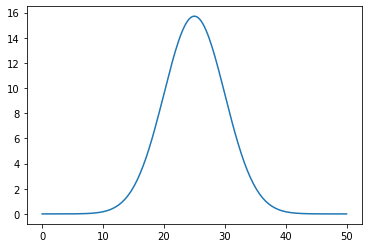

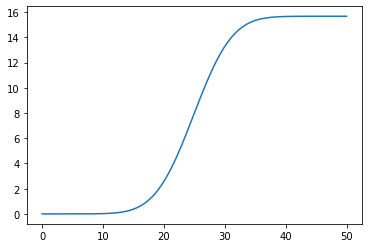

In [70]:
# look up and implement the equations for the PDF and CDF for one distribution from scratch
import numpy as np
import matplotlib.pyplot as plt
 
# define the distribution  parameters
lower = 0
upper = 50
x = np.linspace(lower,upper,200)
mean = np.mean(x)
sd = np.std(x)
 
# calculate and plot the probability density
pdf = (np.pi*stdev) * np.exp(-0.5*((x-mean)/stdev)**2)
plt.plot(x, pdf)
plt.show()

# calculate and plot the cumulative density
cdf = np.cumsum(pdf)/(upper-lower)
plt.plot(x, cdf)
plt.show()
